In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Exporting and cleansing the data

In [2]:
df1= pd.read_csv('Bengaluru_House_Data.csv')
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#Assuming that area_type availability society and balcony is not important
df2=df1.drop(['area_type', 'availability', 'balcony', 'society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['BHK']= df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [11]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [14]:
def convert(x):
    tokens= x.split('-')
    if len(tokens)== 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
convert('1236-2345')

1790.5

In [16]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert)
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [17]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [18]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [19]:
df5=df4.dropna()
df5.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [20]:
df5=df5.drop(['size'],axis='columns')

In [21]:
df5.describe().round(decimals = 2)

,total_sqft,bath,price,BHK
count,13200.00,13200.00,13200.00,13200.00
mean,1555.30,2.69,112.28,2.80
std,1237.32,1.34,149.18,1.29
min,1.00,1.00,8.00,1.00
25%,1100.00,2.00,50.00,2.00
50%,1275.00,2.00,71.85,3.00
75%,1672.00,3.00,120.00,3.00
max,52272.00,40.00,3600.00,43.00


In [22]:
#Feature Engineering
#we need to calculate price per square feet of every property to remove some outliers
df6=df5.copy()
df6['price_persqfeet']= df6['price']*100000/df6['total_sqft']

In [23]:
df6.head()

,location,total_sqft,bath,price,BHK,price_persqfeet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [24]:
#exploring location column
len(df6.location.unique())

1298

In [25]:
#It has 1238 unique values as it is catogorical value when converting into numerical its dim. will increase to large no. so need to remove it
#removing extra spaces 
df6.location= df6.location.apply(lambda x : x.strip())
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending= False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [26]:
#areas which has datasets less than 10 make it as other
len(location_stats[location_stats<=10])

1047

In [27]:
len(df6.location.unique())

1287

In [28]:
location_stats_lessthan_10= location_stats[location_stats<=10]
df6.location=df6.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
df6.head(10)

,location,total_sqft,bath,price,BHK,price_persqfeet
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [29]:
len(df6.location.unique())

241

In [30]:
#outlier detection
#typical price per sqfeet per room is min 300
df6.shape

(13200, 6)

In [31]:
df7=df6[~(df6.total_sqft/df6.BHK < 300)]
df7.shape

(12456, 6)

In [32]:
def remove_pps_out(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_persqfeet)
        st= np.std(subdf.price_persqfeet)
        reduced_df= subdf[((subdf.price_persqfeet) > (m-st)) & ((subdf.price_persqfeet) <= (m+st))]
        df_out=pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

In [33]:
df8 = remove_pps_out(df7)
df8.shape

(10242, 6)

In [34]:
def remove_bhk_out(df):
    exclude_indeces = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_persqfeet) ,
                'std': np.std(bhk_df.price_persqfeet)  ,
                'count': bhk_df.shape[0]
            }
         #   print(bhk_stats.get(bhk)['count'])
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats= bhk_stats.get(bhk-1)
            if stats :
                if stats['count'] > 5:
                    exclude_indeces= np.append(exclude_indeces, bhk_df[bhk_df.price_persqfeet < (stats['mean'])].index.values)
    return df.drop(exclude_indeces, axis='index')

In [35]:
df9 = remove_bhk_out(df8)
df10 = df9.drop(['price_persqfeet'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Machine Learning Model

,total_sqft,bath,price,BHK
count,7317.000000,7317.000000,7317.000000,7317.000000
mean,1493.516501,2.452098,98.839331,2.499932
std,860.566085,1.015090,93.090156,0.926439
min,300.000000,1.000000,10.000000,1.000000
25%,1096.000000,2.000000,50.000000,2.000000
50%,1260.000000,2.000000,73.000000,2.000000
75%,1680.000000,3.000000,112.000000,3.000000
max,30000.000000,16.000000,2200.000000,16.000000


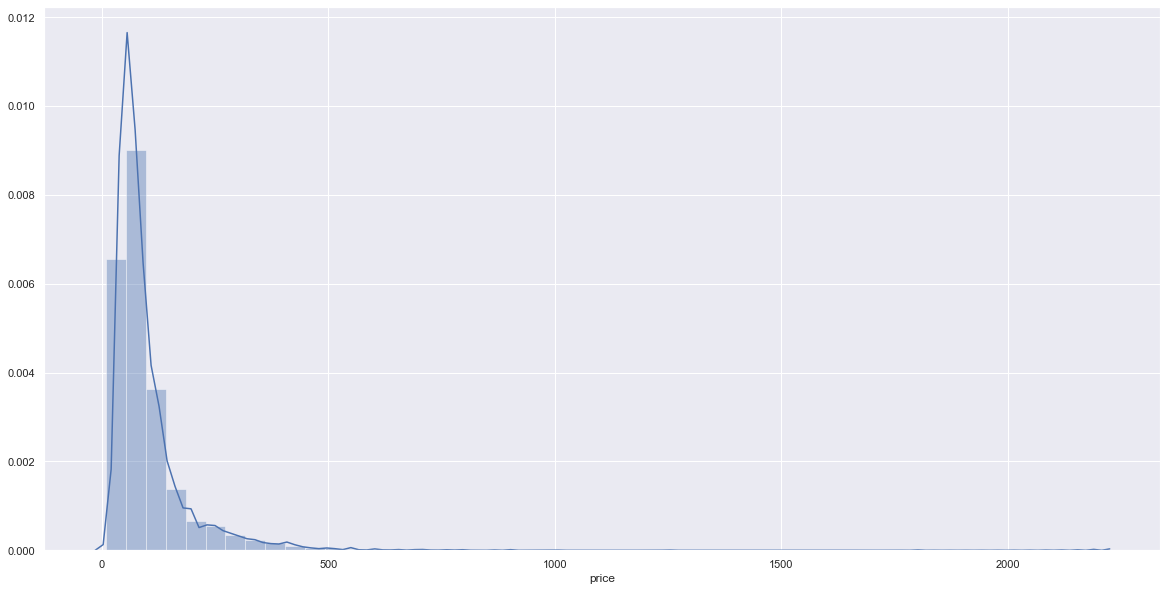

In [36]:
# Exploring PDF's
sns.distplot(df10['price'])
df10.describe()

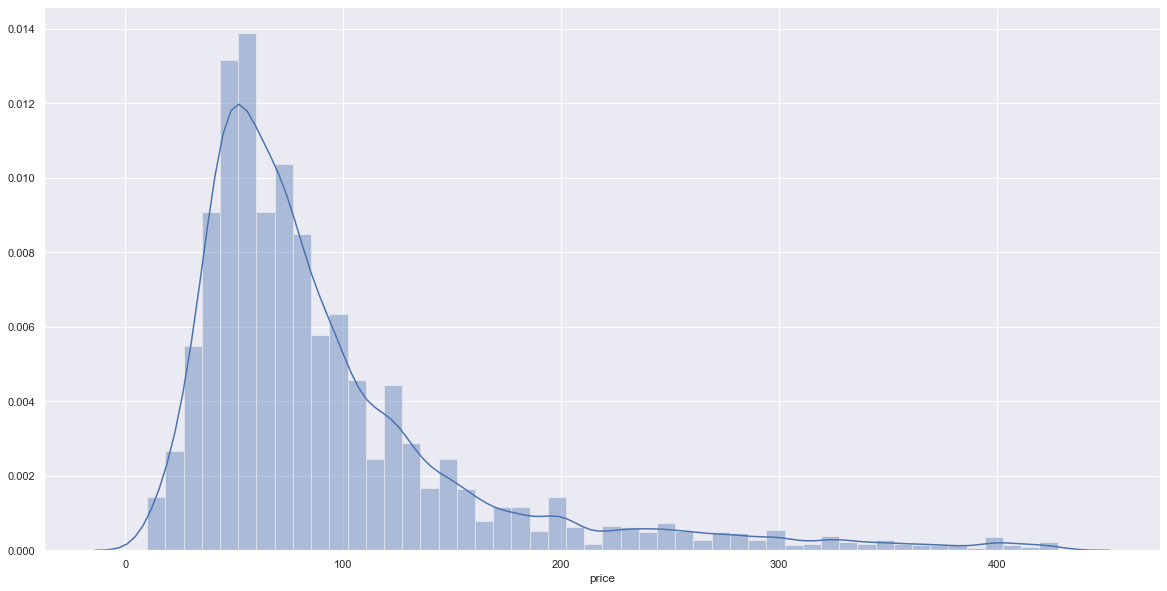

In [37]:
q= df10['price'].quantile(0.99)
df11=df10[df10['price']<q]
sns.distplot(df11['price'])

In [38]:
df11

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [39]:
df12=df11.reset_index(drop=True)
df12

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
7237,other,1200.0,2.0,70.0,2
7238,other,1800.0,1.0,200.0,1
7239,other,1353.0,2.0,110.0,2
7240,other,812.0,1.0,26.0,1


Text(0.5, 1.0, 'Price and BHK')

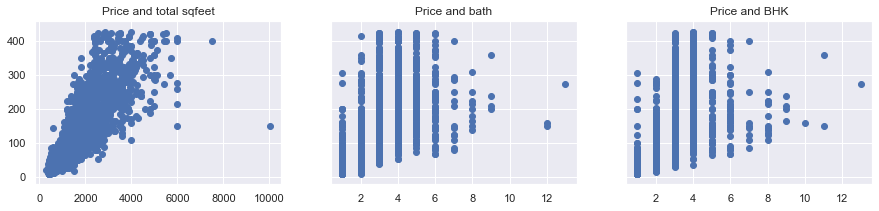

In [40]:
#checking Linearity
f, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey= True, figsize=(15,3))
ax1.scatter(df12['total_sqft'],df12['price'])
ax1.set_title('Price and total sqfeet')
ax2.scatter(df12['bath'],df12['price'])
ax2.set_title('Price and bath')
ax3.scatter(df12['BHK'],df12['price'])
ax3.set_title('Price and BHK')

One Hot Encoding

In [41]:
#one hot encoding for location
dummies=pd.get_dummies(df12.location)
df13=pd.concat([df12, dummies.drop(['other'], axis= 1)], axis = 1)
df14=df13.drop('location', axis= 'columns')
df14.head()
df14.head(10)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x=df14.drop(['price'], axis = 1)
y= df14.price

In [43]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 100)
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
diff= pd.DataFrame()
diff['Actual']= y_test
diff['Predicted']=lin_reg.predict(x_test)
per = (diff['Predicted']-diff['Actual'])/diff['Actual'] * 100
diff['Difference Percentage']= per
diff.describe()

,Actual,Predicted,Difference Percentage
count,1449.000000,1449.000000,1449.000000
mean,93.790145,93.816937,3.072316
std,67.932718,61.040158,29.792641
min,10.000000,-10.271052,-144.656748
25%,50.000000,52.575846,-10.383197
50%,74.000000,77.796006,0.820561
75%,115.000000,117.438085,15.695828
max,425.000000,358.435059,243.582189


In [44]:
def adj_r2(x,y):
    r2=lin_reg.score(x, y)
    adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared
adj_r2(x_train, y_train)

0.8468592919294775

In [45]:
#Implementing Cross-Validation
cv = ShuffleSplit(  n_splits=10,
    test_size=0.2,
    random_state=0)
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

array([0.72829562, 0.87084819, 0.85870251, 0.83872206, 0.8507432 ,
       0.85166986, 0.86537459, 0.7892382 , 0.82876129, 0.84148362])

In [46]:
adj_r2(x_test,y_test)

0.827725239281919

Decision Tree

In [47]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [48]:
clf.predict(x_test)

array([106.74  ,  34.68  ,  50.    , ...,  56.    , 103.8875,  94.    ])

In [49]:
def adj_r2d(x,y):
    r2=clf.score(x, y)
    adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared
adj_r2d(x_train,y_train)

0.9885532450992233

In [50]:
diff1= pd.DataFrame()
diff1['Actual']= y_test
diff1['Predicted']=clf.predict(x_test)
per = (diff1['Predicted']-diff1['Actual'])/diff['Actual'] * 100
diff1['Difference Percentage']= per
diff1

,Actual,Predicted,Difference Percentage
4886,68.0,106.7400,56.970588
6210,60.0,34.6800,-42.200000
5693,36.0,50.0000,38.888889
4343,142.0,280.0000,97.183099
6242,15.0,25.0000,66.666667
...,...,...,...
228,69.0,80.0000,15.942029
2635,46.0,46.9000,1.956522
3157,45.0,56.0000,24.444444
7095,68.0,103.8875,52.775735


In [51]:
adj_r2d(x_test, y_test)

0.6890551880861209

Decision Tree is overfitting its values

Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor(n_estimators=10, random_state=10)
rfreg.fit(x_train,y_train)
def adj_r2r(x,y):
    r2=rfreg.score(x, y)
    adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared
adj_r2r(x_train,y_train)

0.9583299906879645

In [53]:
adj_r2r(x_test, y_test)

0.7589129009527403

Random forest have cured overfitting but not that much what is required

Predicting Values

In [54]:
def predict_price(location, sqft, bath, bhk):
    loc_index=np.where(x.columns==location)[0][0]
    arr=np.zeros(len(x.columns))
    arr[0]=sqft
    arr[1]=bath
    arr[2]=bhk
    if loc_index >=0:
        arr[loc_index]=1
    return lin_reg.predict([arr])[0]

In [55]:
predict_price('1st Phase JP Nagar', 2065.0, 3.0, 3 )

161.90337308157154